In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from numpy import random
from scipy.stats import binom, chisquare, skew

In [45]:
df_long = pd.read_csv("val_results_long.csv")
df_long[:2]

,model,pred,correct,image_index,image_filename,question_index,question_family_index,question,answer,answer_index,answer_dictionary_index
0,18k,24,1,0,CLEVR_val_000000.png,0,39,Are there any other things that are the same s...,no,24,1
1,18k,31,1,0,CLEVR_val_000000.png,1,47,Is there a big brown object of the same shape ...,yes,31,0


In [40]:
accuracy_df = pd.DataFrame(data = [], columns = ["type", "value"])
avg_accuracy = df_long["correct"].sum() / df_long.shape[0]
accuracy_df = accuracy_df.append({"type": "overall_avg", "value" : avg_accuracy}, ignore_index = True)
for model in df_long["model"].drop_duplicates():
    filtered = df_long[df_long["model"] == model]
    accuracy = filtered["correct"].sum()/filtered.shape[0]
    accuracy_df = accuracy_df.append({"type" : model, "value" : accuracy}, ignore_index = True)


baseline = df_long[df_long["model"].isin(["cnn_lstm_sa_mlp", "cnn_lstm_sa", "cnn_lstm", "lstm"])]
baseline_avg = baseline["correct"].sum()/baseline.shape[0]

accuracy_df = accuracy_df.append({
    'type': "baseline_avg",
    'value' : baseline_avg
}, ignore_index = True)

iep = df_long[df_long["model"].isin(["18k", "700k_strong", "9k"])]
iep_avg = iep["correct"].sum()/iep.shape[0]

accuracy_df = accuracy_df.append({
    'type': "iep_avg",
    'value' : iep_avg
}, ignore_index = True)

baselinewithcnn = df_long[df_long["model"].isin(["cnn_lstm_sa_mlp", "cnn_lstm_sa", "cnn_lstm"])]
baseline_with_cnn_avg = baselinewithcnn["correct"].sum()/baselinewithcnn.shape[0]

accuracy_df = accuracy_df.append({
    'type': "baseline_with_cnn_avg",
    'value' : baseline_with_cnn_avg
}, ignore_index = True)

accuracy_df

,type,value
0,overall_avg,0.749031
1,18k,0.951884
2,700k_strong,0.969198
3,9k,0.883393
4,cnn_lstm_sa_mlp,0.731517
5,cnn_lstm_sa,0.694788
6,cnn_lstm,0.541899
7,lstm,0.470535
8,baseline_avg,0.609685
9,iep_avg,0.934825


In [54]:
# res_per_image = pd.DataFrame( data = [], columns = ["image_index", "model", "accuracy", "number_of_corr", "number_of_preds"])
# for im_idx in df_long["image_index"].drop_duplicates():
#     filtered = df_long[df_long["image_index"] == im_idx]
#     for model in df_long["model"].drop_duplicates():
#         filtered_mini = filtered[filtered["model"] == model]
#         numcorr = filtered_mini["correct"].sum()
#         numpred = filtered_mini.shape[0]
#         accuracy = numcorr/numpred
#         res_per_image = res_per_image.append({"model" : model, 
#                                               "image_index" : im_idx, 
#                                               "accuracy" : accuracy, 
#                                               "number_of_corr" : numcorr, 
#                                               "number_of_preds" : numpred}, ignore_index = True)
#         if im_idx % 1000 == 0:
#             print(model, im_idx, accuracy)
# res_per_image
# res_per_image.to_csv("res_per_image2.csv", index = False)


res_per_image = pd.read_csv("res_per_image_per_model.csv")
res_per_image.sort_values(by = "accuracy")

18k 0 0.9
700k_strong 0 1.0
9k 0 1.0
cnn_lstm_sa_mlp 0 0.8
cnn_lstm_sa 0 0.7
cnn_lstm 0 0.8
lstm 0 0.6
18k 1000 1.0
700k_strong 1000 0.9
9k 1000 0.8
cnn_lstm_sa_mlp 1000 0.7
cnn_lstm_sa 1000 0.7
cnn_lstm 1000 0.7
lstm 1000 0.4
18k 2000 1.0
700k_strong 2000 1.0
9k 2000 1.0
cnn_lstm_sa_mlp 2000 0.8
cnn_lstm_sa 2000 0.7
cnn_lstm 2000 0.5
lstm 2000 0.7
18k 3000 1.0
700k_strong 3000 1.0
9k 3000 1.0
cnn_lstm_sa_mlp 3000 0.8
cnn_lstm_sa 3000 0.7
cnn_lstm 3000 0.6
lstm 3000 0.2
18k 4000 0.8
700k_strong 4000 1.0
9k 4000 0.8
cnn_lstm_sa_mlp 4000 0.8
cnn_lstm_sa 4000 0.7
cnn_lstm 4000 0.5
lstm 4000 0.5
18k 5000 1.0
700k_strong 5000 1.0
9k 5000 0.9
cnn_lstm_sa_mlp 5000 0.8
cnn_lstm_sa 5000 0.8
cnn_lstm 5000 0.8
lstm 5000 0.8
18k 6000 1.0
700k_strong 6000 1.0
9k 6000 0.9
cnn_lstm_sa_mlp 6000 0.9
cnn_lstm_sa 6000 0.8
cnn_lstm 6000 0.6
lstm 6000 0.6
18k 7000 0.9
700k_strong 7000 0.9
9k 7000 1.0
cnn_lstm_sa_mlp 7000 0.8
cnn_lstm_sa 7000 0.7
cnn_lstm 7000 0.4
lstm 7000 0.6
18k 8000 1.0
700k_strong 8000

,image_index,model,accuracy,number_of_corr,number_of_preds
49930,7132,lstm,0.0,0,10
3877,553,lstm,0.0,0,10
19249,2749,lstm,0.0,0,10
87870,12552,lstm,0.0,0,10
61206,8743,cnn_lstm,0.0,0,10
...,...,...,...,...,...
83162,11880,9k,1.0,10,10
83161,11880,700k_strong,1.0,10,10
83160,11880,18k,1.0,10,10
14680,2097,700k_strong,1.0,10,10


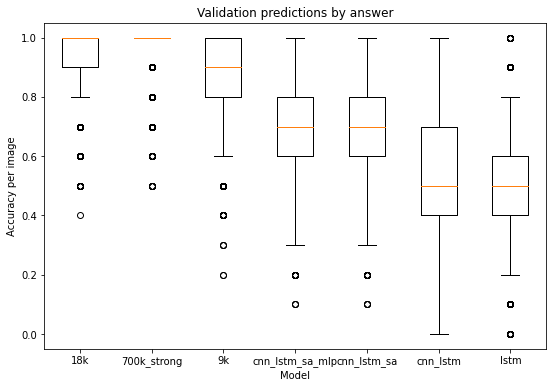

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy per image')
plt.title('Validation predictions by answer')

model_types = res_per_image["model"].drop_duplicates()
data = []
for model in model_types:
    data.append(res_per_image[res_per_image["model"] == model]["accuracy"])
ax.boxplot(data)
ax.set_xticklabels(model_types)

fig.savefig("models_per_image_accuracy.png", bbox_inches= "tight")
plt.show()


In [14]:
per_image_avg = pd.DataFrame(data = [], columns = ["image_index", "overall_avg", "baseline_avg", "iep_avg", "baseline_with_cnn_avg"])
for image in res_per_image["image_index"].drop_duplicates():
    filtered = res_per_image[res_per_image["image_index"] == image]
    overall_avg = filtered["accuracy"].sum()/filtered.shape[0]
    
    baseline = filtered[filtered["model"].isin(["cnn_lstm_sa_mlp", "cnn_lstm_sa", "cnn_lstm", "lstm"])]
    baseline_avg = baseline["accuracy"].sum()/baseline.shape[0]
    
    iep = filtered[filtered["model"].isin(["18k", "700k_strong", "9k"])]
    iep_avg = iep["accuracy"].sum()/iep.shape[0]
    
    baselinewithcnn = filtered[filtered["model"].isin(["cnn_lstm_sa_mlp", "cnn_lstm_sa", "cnn_lstm"])]
    baseline_with_cnn_avg = baselinewithcnn["accuracy"].sum()/baselinewithcnn.shape[0]
    
    per_image_avg = per_image_avg.append({
        "image_index" : image, 
        "overall_avg" : overall_avg, 
        "baseline_avg" : baseline_avg, 
        "iep_avg": iep_avg,
        "baseline_with_cnn_avg" : baseline_with_cnn_avg
    }, ignore_index = True)
    
    if image % 10000 == 0:
        print(image)

0
10000


In [15]:
per_image_avg.to_csv("res_per_image")

,image_index,overall_avg,baseline_avg,iep_avg,baseline_with_cnn_avg
0,0.0,0.828571,0.725,0.966667,0.766667
1,1.0,0.828571,0.700,1.000000,0.733333
2,2.0,0.685714,0.475,0.966667,0.566667
3,3.0,0.671429,0.525,0.866667,0.566667
4,4.0,0.657143,0.625,0.700000,0.666667
...,...,...,...,...,...
14995,14995.0,0.700000,0.575,0.866667,0.566667
14996,14996.0,0.842857,0.725,1.000000,0.766667
14997,14997.0,0.671429,0.525,0.866667,0.600000
14998,14998.0,0.871429,0.800,0.966667,0.833333


In [41]:
for col in [ "overall_avg", "baseline_avg", "iep_avg", "baseline_with_cnn_avg"]:
    dev = np.subtract(per_image_avg[col].values, accuracy_df[accuracy_df["type"] == col]["value"].values[0])
    per_image_avg[col + "_dev"] = dev

In [48]:
per_image_avg.sort_values(by = "baseline_avg")

,image_index,overall_avg,baseline_avg,iep_avg,baseline_with_cnn_avg,baseline_avg_dev,iep_avg_dev,baseline_with_cnn_avg_dev,overall_avg_dev
8552,8552.0,0.514286,0.200,0.933333,0.233333,-0.409685,-0.001492,-0.422735,-0.234745
2645,2645.0,0.471429,0.225,0.800000,0.266667,-0.384685,-0.134825,-0.389402,-0.277602
1999,1999.0,0.471429,0.225,0.800000,0.300000,-0.384685,-0.134825,-0.356068,-0.277602
14517,14517.0,0.528571,0.225,0.933333,0.300000,-0.384685,-0.001492,-0.356068,-0.220459
13142,13142.0,0.428571,0.225,0.700000,0.300000,-0.384685,-0.234825,-0.356068,-0.320459
...,...,...,...,...,...,...,...,...,...
10434,10434.0,0.942857,0.925,0.966667,0.966667,0.315315,0.031842,0.310598,0.193826
12611,12611.0,0.942857,0.925,0.966667,1.000000,0.315315,0.031842,0.343932,0.193826
2221,2221.0,0.971429,0.950,1.000000,0.966667,0.340315,0.065175,0.310598,0.222398
8159,8159.0,0.957143,0.950,0.966667,0.933333,0.340315,0.031842,0.277265,0.208112


In [50]:
df_long[df_long["image_index"] == 0].shape[0]

70

In [58]:
print(res_per_image["number_of_preds"].drop_duplicates())

res_per_image[:4]

0        10
22631     9
39165     2
Name: number_of_preds, dtype: object


,image_index,model,accuracy,number_of_corr,number_of_preds
0,0,18k,0.9,9,10
1,0,700k_strong,1.0,10,10
2,0,9k,1.0,10,10
3,0,cnn_lstm_sa_mlp,0.8,8,10


In [63]:
correct_hist = pd.DataFrame(data = [], columns = ["model", 
                                                  "10correct",  "9correct", "8correct", "7correct", "6correct", 
                                                  "5correct", "4correct", "3correct", "2correct", "1correct", "0correct"])
for model in res_per_image["model"].drop_duplicates():
    correct_hist = correct_hist.append({
        "model": model, 
        "10correct": 0 ,  "9correct": 0 , "8correct": 0 , "7correct": 0 , "6correct": 0 , 
        "5correct": 0 , "4correct": 0 , "3correct": 0 , "2correct": 0 , "1correct": 0 , "0correct": 0
    }, ignore_index = True)
correct_hist = correct_hist.set_index("model")
for i in range(res_per_image.shape[0]):
    number = res_per_image.loc[i, "number_of_corr"]
    model = res_per_image.loc[i, "model"]
    correct_hist.at[model, str(number)+"correct"] = correct_hist.loc[model, str(number)+"correct"] + 1

correct_hist

,10correct,9correct,8correct,7correct,6correct,5correct,4correct,3correct,2correct,1correct,0correct
model,,,,,,,,,,,
18k,9810,3700,1078,304,86,20,1,0,1,0,0
700k_strong,11421,2760,634,150,27,7,0,0,1,0,0
9k,4857,5277,3095,1225,401,126,13,3,3,0,0
cnn_lstm_sa_mlp,803,2475,3862,3697,2453,1227,359,108,12,4,0
cnn_lstm_sa,452,1707,3384,4009,2975,1663,629,156,20,5,0
cnn_lstm,44,370,1132,2378,3375,3362,2439,1309,482,101,8
lstm,12,120,517,1411,2740,3384,3220,2287,994,274,41


18k  accuracy:  0.9518837796934483
700k_strong  accuracy:  0.9691981518891134
9k  accuracy:  0.8833930035802148
cnn_lstm_sa_mlp  accuracy:  0.7315172243667953
cnn_lstm_sa  accuracy:  0.6947883539679047
cnn_lstm  accuracy:  0.5418991806175038
lstm  accuracy:  0.4705348987605923


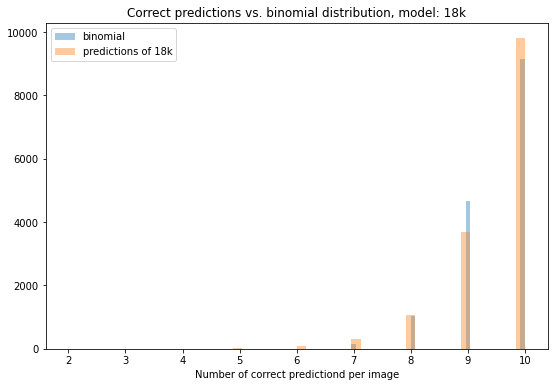

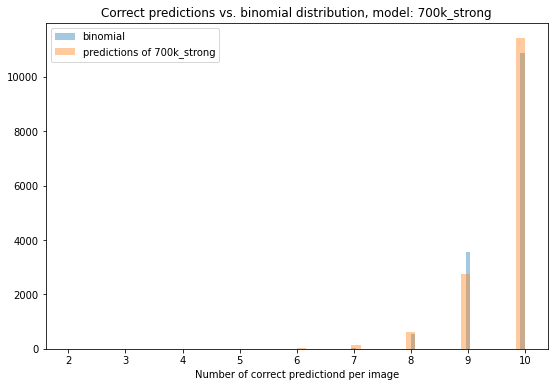

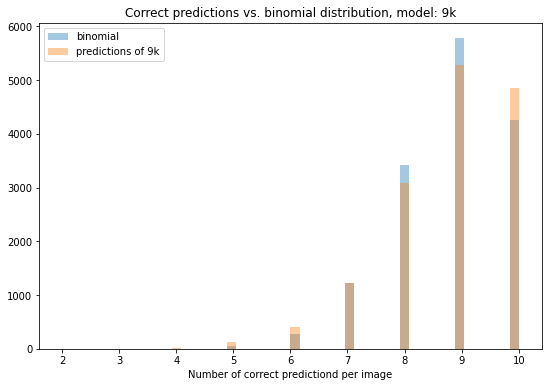

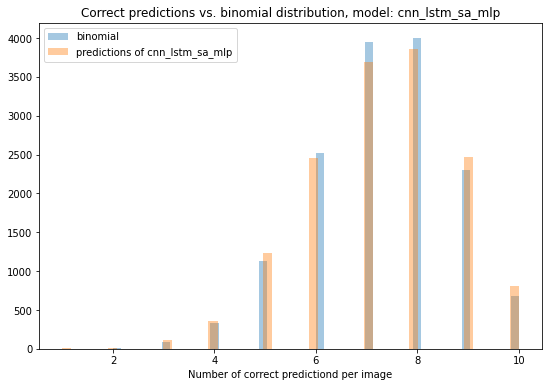

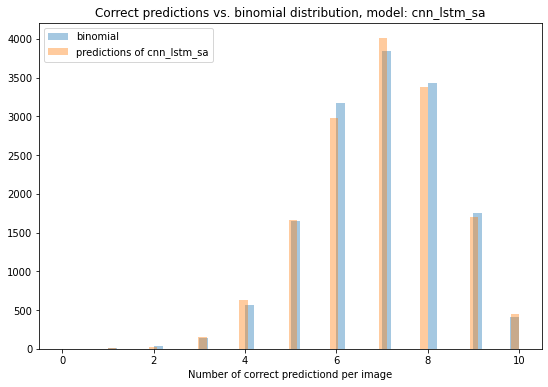

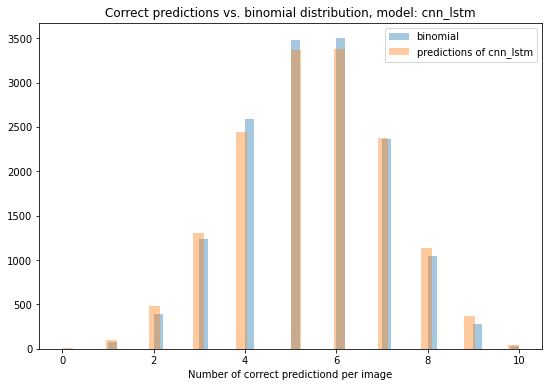

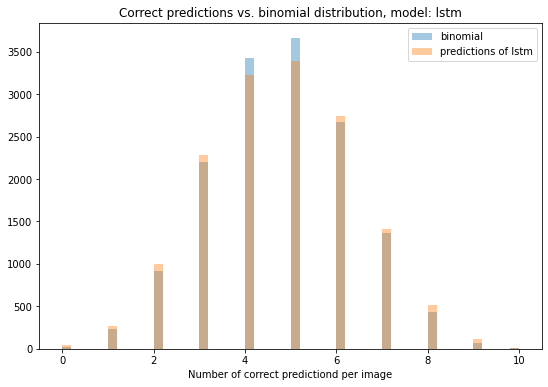

In [90]:
for model in correct_hist.index:
    accuracy = accuracy_df[accuracy_df["type"] == model]["value"].values[0]
    print(model , " accuracy: ", accuracy)
    r = random.binomial(n=10, p=accuracy, size=15000)
    
    f, ax = plt.subplots(1, 1)
    sns.distplot(r, hist=True, kde=False, label = "binomial")
    sns.distplot(res_per_image[res_per_image["model"] == model]["number_of_corr"], hist=True, kde=False, label = "predictions of " + model )
    
    ax.legend()
    ax.set_xlabel('Number of correct predictiond per image')
    plt.title('Correct predictions vs. binomial distribution, model: '+model)
    f.set_size_inches(9,6)

#     plt.show() 
    plt.savefig("val_correct_distribution_"+ model + ".png", bbox_inches= "tight")


In [124]:
min_bin_size = 10

distribution_df = pd.DataFrame(data = [], columns = ["model", "accuracy", "bin_from",  "bin_to", "correct_pred", "binomial", "p"])
model_bins = {
    "18k" : [(10,10), (9,9), (8,8), (7,7), (6,0)],
    "700k_strong" : [(10,10), (9,9), (8,8), (7,0)],
    "9k" : [(10,10), (9,9), (8,8), (7,7), (6,6), (5,0)],
    "cnn_lstm_sa_mlp" : [(10,10), (9,9), (8,8), (7,7), (6,6), (5,5), (4,4), (3,3), (2,0)],
    "cnn_lstm_sa" : [(10,10), (9,9), (8,8), (7,7), (6,6), (5,5), (4,4), (3,3), (2,0)],
    "cnn_lstm" : [(10,10), (9,9), (8,8), (7,7), (6,6), (5,5), (4,4), (3,3), (2,2), (1,0)],
    "lstm" : [(10,9), (8,8), (7,7), (6,6), (5,5), (4,4), (3,3), (2,2), (1,1), (0,0)]
}

for model in res_per_image["model"].drop_duplicates():
    bins = model_bins[model]
    accuracy = accuracy_df[accuracy_df["type"] == model]["value"].values[0]
    correct = res_per_image[res_per_image["model"] == model]
    accuracy = accuracy_df[accuracy_df["type"] == model]["value"].values[0]
    binom = random.binomial(n = 10, p=accuracy, size=15000)

    print(model , " accuracy: ", accuracy)
    
    for b in bins:
        bin_from = b[1]
        bin_to = b[0]
        num_correct_pred = correct[(correct["number_of_corr"] >= bin_from) & (correct["number_of_corr"] <= bin_to)].shape[0]
        num_binom = len( binom[(binom>= bin_from) & (binom <= bin_to)])
        
#         p = chisquare(f_obs = correct[(correct["number_of_corr"] >= bin_from) & (correct["number_of_corr"] <= bin_to)]["number_of_corr"], 
#                       f_exp = binom[(binom>= bin_from) & (binom <= bin_to)], 
#                       ddof = len(bins)-1)

        p = (num_correct_pred-num_binom)*(num_correct_pred-num_binom)/num_binom
        
        distribution_df = distribution_df.append({
            "model" : model, 
            "accuracy": accuracy, 
            "bin_from": bin_from,  
            "bin_to" : bin_to, 
            "correct_pred" : num_correct_pred, 
            "binomial" : num_binom, 
            "p" : p
        }, ignore_index = True)
distribution_df.to_csv("val_distribution_analysis.csv")
distribution_df

18k  accuracy:  0.9518837796934483
700k_strong  accuracy:  0.9691981518891134
9k  accuracy:  0.8833930035802148
cnn_lstm_sa_mlp  accuracy:  0.7315172243667953
cnn_lstm_sa  accuracy:  0.6947883539679047
cnn_lstm  accuracy:  0.5418991806175038
lstm  accuracy:  0.4705348987605923


,model,accuracy,bin_from,bin_to,correct_pred,binomial,p
0,18k,0.951884,10,10,9810,9125,51.421918
1,18k,0.951884,9,9,3700,4633,187.888841
2,18k,0.951884,8,8,1078,1094,0.234004
3,18k,0.951884,7,7,304,132,224.121212
4,18k,0.951884,0,6,108,16,529.000000
5,700k_strong,0.969198,10,10,11421,11002,15.957190
6,700k_strong,0.969198,9,9,2760,3483,150.080103
7,700k_strong,0.969198,8,8,634,481,48.667360
8,700k_strong,0.969198,0,7,185,34,670.617647
9,9k,0.883393,10,10,4857,4358,57.136531


In [125]:
for model in distribution_df["model"].drop_duplicates():
    p = chisquare(f_obs = distribution_df[distribution_df["model"] == model]["correct_pred"], 
                  f_exp = distribution_df[distribution_df["model"] == model]["binomial"])
    szum = distribution_df[distribution_df["model"] == model]["p"].sum()
    print(p, "\t", szum, "\t", model)

Power_divergenceResult(statistic=992.6659745095459, pvalue=1.3866591281856446e-213) 	 992.6659745095459 	 18k
Power_divergenceResult(statistic=885.3222996872469, pvalue=1.351094587886043e-191) 	 885.3222996872469 	 700k_strong
Power_divergenceResult(statistic=400.4272400336788, pvalue=2.3998467135525033e-84) 	 400.4272400336788 	 9k
Power_divergenceResult(statistic=86.23335909705557, pvalue=2.697740697545633e-15) 	 86.23335909705557 	 cnn_lstm_sa_mlp
Power_divergenceResult(statistic=38.97344384586457, pvalue=4.971459331530986e-06) 	 38.97344384586458 	 cnn_lstm_sa
Power_divergenceResult(statistic=113.50180303120842, pvalue=2.8430685825053595e-20) 	 113.50180303120841 	 cnn_lstm
Power_divergenceResult(statistic=104.38793866024614, pvalue=2.0323803046975445e-18) 	 104.38793866024614 	 lstm


In [138]:
skewness_df = pd.DataFrame(data= [], columns = ["model", "accuracy", "prediction_skewness", "binomial_skewness"])
for model in res_per_image["model"].drop_duplicates():
    bins = model_bins[model]
    accuracy = accuracy_df[accuracy_df["type"] == model]["value"].values[0]
    correct = res_per_image[res_per_image["model"] == model]["number_of_corr"]
    binom = random.binomial(n = 10, p=accuracy, size=15000)
    print(model , " accuracy: ", accuracy)
    print("binomial skewness: ", skew(binom))
    print("prediction skewness: ", skew(correct))
    skewness_df = skewness_df.append({
        "model": model , 
        "accuracy": accuracy, 
        "prediction_skewness": skew(correct), 
        "binomial_skewness" : skew(binom)
    }, ignore_index = True)
skewness_df

18k  accuracy:  0.9518837796934483
binomial skewness:  -1.3059002494511114
prediction skewness:  -1.9611202268584595
700k_strong  accuracy:  0.9691981518891134
binomial skewness:  -1.662459722154352
prediction skewness:  -2.467745659748146
9k  accuracy:  0.8833930035802148
binomial skewness:  -0.7461138433617455
prediction skewness:  -1.0031273524075655
cnn_lstm_sa_mlp  accuracy:  0.7315172243667953
binomial skewness:  -0.2998654080778803
prediction skewness:  -0.3556071824603108
cnn_lstm_sa  accuracy:  0.6947883539679047
binomial skewness:  -0.2434068758481022
prediction skewness:  -0.25733556384510003
cnn_lstm  accuracy:  0.5418991806175038
binomial skewness:  -0.06119775413496075
prediction skewness:  -0.06148865039199661
lstm  accuracy:  0.4705348987605923
binomial skewness:  0.04320465809276608
prediction skewness:  0.03771620550410585


,model,accuracy,prediction_skewness,binomial_skewness
0,18k,0.951884,-1.961120,-1.305900
1,700k_strong,0.969198,-2.467746,-1.662460
2,9k,0.883393,-1.003127,-0.746114
3,cnn_lstm_sa_mlp,0.731517,-0.355607,-0.299865
4,cnn_lstm_sa,0.694788,-0.257336,-0.243407
5,cnn_lstm,0.541899,-0.061489,-0.061198
6,lstm,0.470535,0.037716,0.043205
